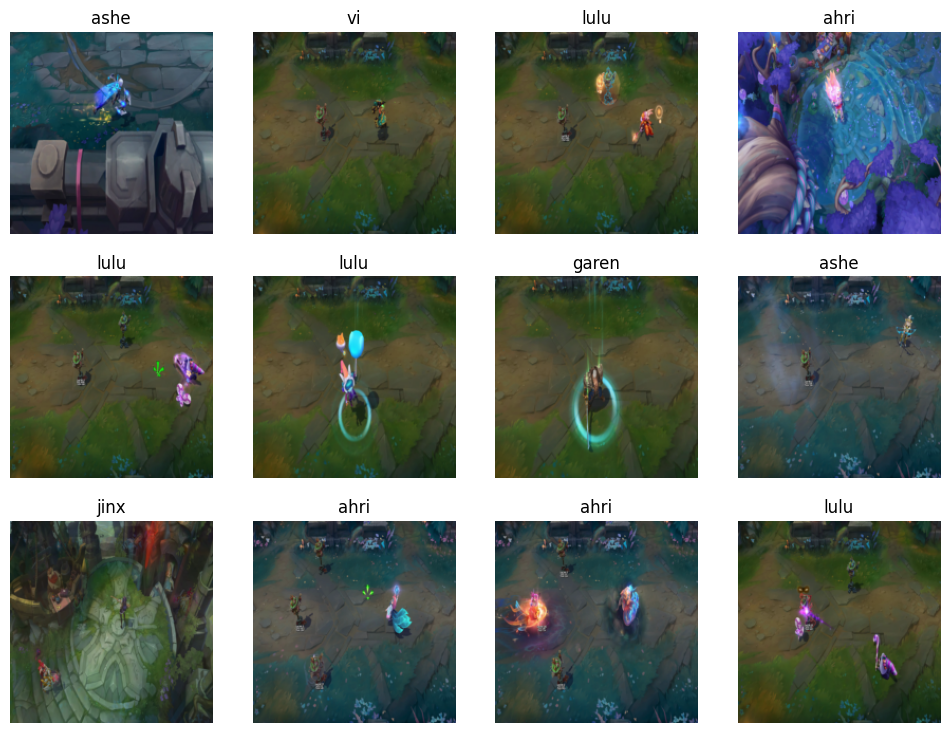

In [1]:
from fastai.vision.all import *
from pathlib import Path

path = Path('data/champions')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')],
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.260429,0.616973,0.198397,03:24


epoch,train_loss,valid_loss,error_rate,time
0,0.579472,0.661699,0.172345,03:20
1,0.366711,0.458757,0.136273,03:20
2,0.242089,0.285124,0.102204,03:20
3,0.135255,0.280646,0.094188,03:22


In [ ]:
from fastai.vision.all import *
from pathlib import Path
import torch

path = Path('data/champions')

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2, # 20% for validation
    seed=42, # For reproducibility
    item_tfms=Resize(256), # Basic resizing
    # batch_tfms=aug_transforms(size=224),
    device=default_device(device)
)

learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.864537,0.736056,0.760563,02:45


epoch,train_loss,valid_loss,accuracy,time
0,0.994366,0.520906,0.826962,02:51
1,0.790235,0.376942,0.887324,04:03
2,0.620978,0.326808,0.903421,02:53
3,0.494360,0.317733,0.907445,02:53
4,0.401802,0.308338,0.907445,02:52


Prediction: garen
Confidence: 0.4911


<Axes: >

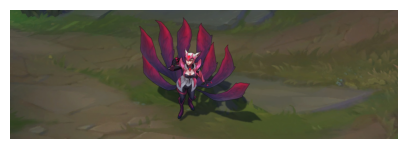

In [20]:
img = PILImage.create('data/screenshots/test_image_002.jpg')

pred_class, pred_idx, probs = learn.predict(img)

print(f"Prediction: {pred_class}")
print(f"Confidence: {probs[pred_idx]:.4f}")
img.show()
